<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Введение:

По имеющимся данным заказчик просит спрогнозировать, уйдет ли клиент в ближайшее время.

**Цель:

Подготовить модель, имеющую F1 меру не менее 0,59

## Подготовка данных

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

Импортирую необходимые библиотеки

In [153]:
RANDOM_STATE = 12345

Глобальные константы

In [154]:
data = pd.read_csv('Churn.csv')

In [155]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [157]:
data_second = data

Прочитал и изучил данные. 
По первой оценке видно, что есть пропуски в столбце "Tenure". Возможно, эти данные неполучилось собрать, т.к. клиент пользуется услугамми банка дольше, чем сам банк собирает данные

In [158]:
data_second['Gender'].unique()

array(['Female', 'Male'], dtype=object)

В этом столбце есть всего два гендера

In [159]:
data_second['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

В категориальном стобце 'Geography', его трогать не будем, т.к. это может быть значимый фактор

In [160]:
data_second = data_second.drop(['Surname', 'CustomerId', 'RowNumber'], axis = 1);

Безжалостно удалю все имена. Ведб как известно, исчезновение одного человека - трагедия, 10000 - статистика

P.S. Предполагаю, что фамилия не влияет на выход из клиентов банка

Аналогично поступлю с CustomerId и RowNumber

In [161]:
data['CustomerId'].duplicated().sum()

0

В наиболее важном столбце данных "CustomerId" нет дубликатов

In [162]:
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [163]:
data['Tenure'].isnull().sum()

909

909 пропусков в столбце Tenure. Т.к. удаление приведет к значительной потере данных (около 9%), заменим пропуски на медианные значения в зависимости от возраста

In [164]:
#data_second = data

#for age in data_second['Age'].unique():
#    data_second.loc[(data_second['Tenure'].isna()) & (data_second['Age'] == age), 'Tenure']\
#    = data_second.loc[(data_second['Age'] == age), 'Tenure'].median()

In [165]:
data_second = pd.get_dummies(data_second, prefix = ['Geography', 'Gender'], drop_first = True)
print(data_second.head(10))
scaler = StandardScaler()

data_second = pd.DataFrame(scaler.fit_transform(data_second), columns = data_second.columns)

data_second_test = data_second[data_second['Tenure'].isnull()].copy()
data_second_train = data_second.dropna().copy()

features_train_second = data_second_train.drop('Tenure', axis = 1)
features_test_second = data_second_test.drop('Tenure', axis = 1)

target_train_second = data_second_train['Tenure']
target_test_second = data_second_test['Tenure']

drops_model = LinearRegression()
drops_model.fit(features_train_second, target_train_second)
drops_predict = drops_model.predict(features_test_second)

data_second_test['Tenure'] = drops_predict

data_second = pd.concat([data_second_train, data_second_test])
data_second.sort_index(inplace = True)
data_second = pd.DataFrame(scaler.inverse_transform(data_second), columns = data_second.columns)

data_second

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42     2.0       0.00              1          1   
1          608   41     1.0   83807.86              1          0   
2          502   42     8.0  159660.80              3          1   
3          699   39     1.0       0.00              2          0   
4          850   43     2.0  125510.82              1          1   
5          645   44     8.0  113755.78              2          1   
6          822   50     7.0       0.00              2          1   
7          376   29     4.0  115046.74              4          1   
8          501   44     4.0  142051.07              2          0   
9          684   27     2.0  134603.88              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.000000,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,2.775558e-17,0.0
1,608.0,41.0,1.000000,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.000000e+00,0.0
2,502.0,42.0,8.000000,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,2.775558e-17,0.0
3,699.0,39.0,1.000000,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,2.775558e-17,0.0
4,850.0,43.0,2.000000,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.000000,0.00,2.0,1.0,0.0,96270.64,0.0,0.0,2.775558e-17,1.0
9996,516.0,35.0,10.000000,57369.61,1.0,1.0,1.0,101699.77,0.0,0.0,2.775558e-17,1.0
9997,709.0,36.0,7.000000,0.00,1.0,0.0,1.0,42085.58,1.0,0.0,2.775558e-17,0.0
9998,772.0,42.0,3.000000,75075.31,2.0,1.0,0.0,92888.52,1.0,1.0,2.775558e-17,1.0


In [166]:
data_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  float64
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


Устранена проблема пропусков

In [167]:
data_second.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,2.775558e-17,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.000000e+00,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,2.775558e-17,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,2.775558e-17,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.000000e+00,0.0


In [168]:
data_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   HasCrCard          10000 non-null  float64
 6   IsActiveMember     10000 non-null  float64
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  float64
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


Данные готовы к работе

1 - клиент ушел, 0 - клиент не ушел


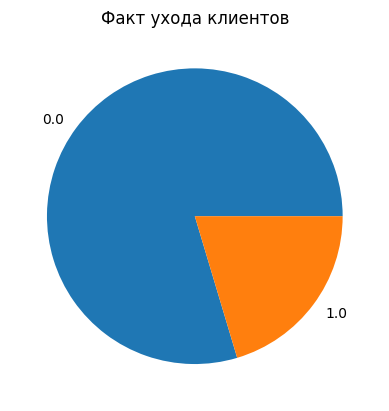

In [169]:
data_second.groupby('Exited')['CreditScore'].count().plot(kind = 'pie', y='1')

pl.title("Факт ухода клиентов")
print('1 - клиент ушел, 0 - клиент не ушел')
pl.xlabel("")
pl.ylabel("");

## Исследование задачи

In [170]:
def roc_auc_roc(model, features_valid, target_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  

    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show() 
    
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

    
    print('AUC-ROC:',auc_roc)
    return

Функия расчета AUC-ROC и постройки ROC кривой

In [171]:
data_ohe = pd.get_dummies(data_second, drop_first = True)

Дамми ловушка

In [172]:
#data_train, data_val, data_test = np.split(data_ohe.sample(frac=1, random_state=RANDOM_STATE), [int(.6*len(data)), int(.8*len(data))])

#features_train = data_train.drop(['Exited'], axis = 1)
#target_train = data_train['Exited']

#features_valid = data_val.drop(['Exited'], axis = 1)
#target_valid = data_val['Exited']

#features_test = data_test.drop(['Exited'], axis = 1)
#target_test = data_test['Exited']

In [173]:
data_ohe_second = data_ohe

data_train, data_val, data_test = np.split(data_ohe_second.sample(frac=1, random_state=RANDOM_STATE), [int(.6*len(data)), int(.8*len(data))])

features_train = data_train.drop(['Exited'], axis = 1)
target_train = data_train['Exited']

features_valid = data_val.drop(['Exited'], axis = 1)
target_valid = data_val['Exited']

features_test = data_test.drop(['Exited'], axis = 1)
target_test = data_test['Exited']


C:\Users\miks9\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [174]:
pd.options.mode.chained_assignment = None

numeric = list(['Balance', 'EstimatedSalary', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts'])


scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [175]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.095446,0.692527,-0.711446,-1.207343,-0.934554,1.0,1.0,0.967598,0.0,1.000000e+00,0.0
1402,1.108213,-0.948724,1.088626,0.869462,-0.934554,1.0,0.0,-0.403069,0.0,2.775558e-17,1.0
8606,1.622597,0.306351,0.008583,-1.207343,0.789186,1.0,1.0,-0.447751,0.0,1.000000e+00,1.0
8885,0.192609,0.595983,-0.351432,0.426066,0.789186,1.0,1.0,1.004463,0.0,1.000000e+00,1.0
6494,0.511528,-1.045268,0.728612,-1.207343,0.789186,1.0,1.0,-1.356118,0.0,2.775558e-17,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2053,2.064968,2.333778,1.088626,1.499422,-0.934554,0.0,0.0,1.452035,0.0,2.775558e-17,1.0
6663,2.064968,-0.755635,-0.351432,1.128943,-0.934554,1.0,1.0,-0.187260,1.0,2.775558e-17,1.0
902,-0.044007,0.885616,0.728612,0.236822,-0.934554,1.0,1.0,0.843720,0.0,2.775558e-17,0.0
2379,-0.260049,-1.238356,1.448640,-0.017075,0.789186,0.0,0.0,-1.207439,0.0,2.775558e-17,1.0


разбил выборки на train/valid/test

In [176]:
model = LogisticRegression(random_state = RANDOM_STATE, solver='liblinear', max_iter=1000)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))



F1: 0.29739776951672864


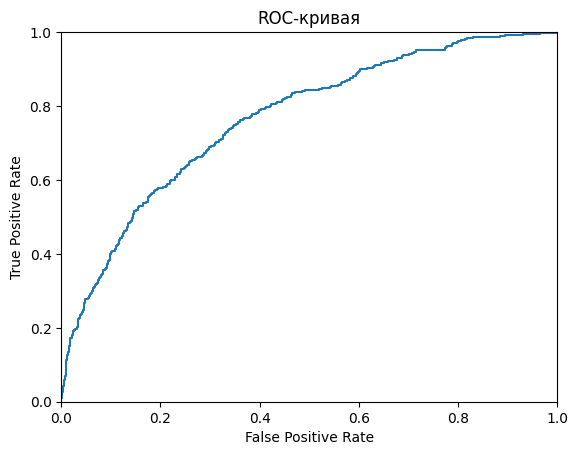

AUC-ROC: 0.7652876296944094


In [177]:
roc_auc_roc(model, features_valid, target_valid)

Без учета дисбланса классов модель логистической регресси дала совсем плохой F1-score около 0,30

In [178]:
model = DecisionTreeClassifier(random_state = RANDOM_STATE)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.47259439707673573


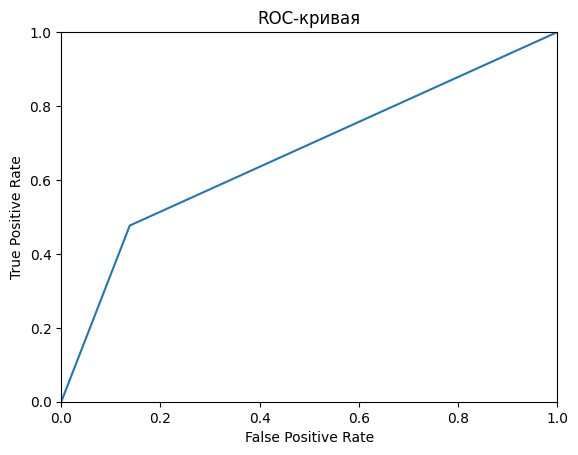

AUC-ROC: 0.6692771353788303


In [179]:
roc_auc_roc(model, features_valid, target_valid)

In [180]:
model = RandomForestClassifier(random_state = RANDOM_STATE)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.536741214057508


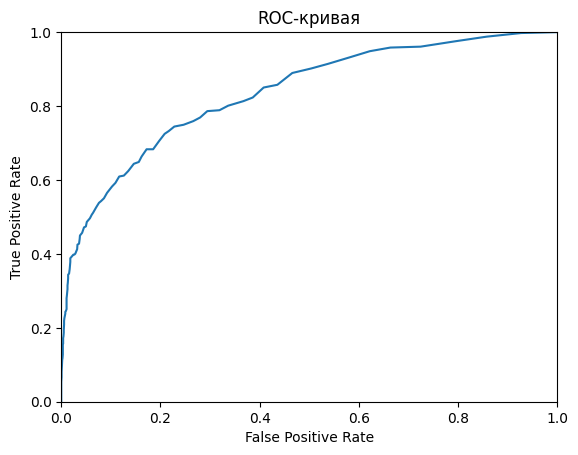

AUC-ROC: 0.8347731398578857


In [181]:
roc_auc_roc(model, features_valid, target_valid)

## Борьба с дисбалансом

In [182]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

Функция увеличения выборки, пригодится далее

In [183]:
#data_ohe_second = data_ohe

#data_train, data_val, data_test = np.split(data_ohe_second.sample(frac=1, random_state=RANDOM_STATE), [int(.6*len(data)), int(.8*len(data))])

#features_train = data_train.drop(['Exited'], axis = 1)
#target_train = data_train['Exited']

#features_valid = data_val.drop(['Exited'], axis = 1)
#target_valid = data_val['Exited']

#features_test = data_test.drop(['Exited'], axis = 1)
#target_test = data_test['Exited']


Разделил выборку на 60/20/20 - train/valid/test и разделил на признаки и таргеты

In [184]:
#pd.options.mode.chained_assignment = None

#numeric = list(['Balance', 'EstimatedSalary', 'CreditScore', 'Age', 'Tenure', 'Geography_Germany',\
               #'Geography_Spain'])


#scaler.fit(features_train[numeric])

#features_train[numeric] = scaler.transform(features_train[numeric])
#features_valid[numeric] = scaler.transform(features_valid[numeric])
#features_test[numeric] = scaler.transform(features_test[numeric])

Провел масштабирование признаков


In [185]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7867,-0.095446,0.692527,-0.711446,-1.207343,-0.934554,1.0,1.0,0.967598,0.0,1.000000e+00,0.0
1402,1.108213,-0.948724,1.088626,0.869462,-0.934554,1.0,0.0,-0.403069,0.0,2.775558e-17,1.0
8606,1.622597,0.306351,0.008583,-1.207343,0.789186,1.0,1.0,-0.447751,0.0,1.000000e+00,1.0
8885,0.192609,0.595983,-0.351432,0.426066,0.789186,1.0,1.0,1.004463,0.0,1.000000e+00,1.0
6494,0.511528,-1.045268,0.728612,-1.207343,0.789186,1.0,1.0,-1.356118,0.0,2.775558e-17,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2053,2.064968,2.333778,1.088626,1.499422,-0.934554,0.0,0.0,1.452035,0.0,2.775558e-17,1.0
6663,2.064968,-0.755635,-0.351432,1.128943,-0.934554,1.0,1.0,-0.187260,1.0,2.775558e-17,1.0
902,-0.044007,0.885616,0.728612,0.236822,-0.934554,1.0,1.0,0.843720,0.0,2.775558e-17,0.0
2379,-0.260049,-1.238356,1.448640,-0.017075,0.789186,0.0,0.0,-1.207439,0.0,2.775558e-17,1.0


In [186]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.29739776951672864


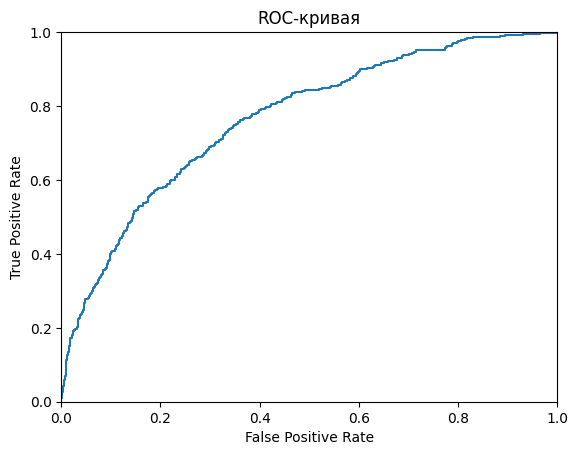

AUC-ROC: 0.7652876296944094


In [187]:
roc_auc_roc(model, features_valid, target_valid)

Значения хуже

In [188]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]   

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49822695035460995


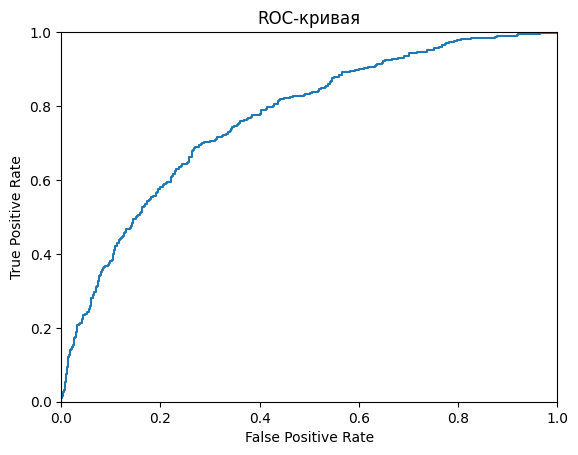

AUC-ROC: 0.7654218162692737


In [189]:
roc_auc_roc(model, features_valid, target_valid)

С учетом баланса классов, результат лучше, чем в прошлой модели, но все еще недостаточно хорош

In [190]:
best_result = 0

for threshold in np.arange(0, 0.9, 0.01):
    predicted_valid =  probabilities_one_valid > threshold 
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_result = result
        best_threshold = threshold
        
print('F1:', best_result, 'Порог:', best_threshold)

F1: 0.5004516711833785 Порог: 0.51


Попытка поиграться с порогами дали F1 ~0,51

In [191]:
best_result = 0
best_i = 0


for i in range(1, 20):
    features_upsampled, target_upsampled = upsample(features_train, target_train, i)
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_result = result
        best_i = i
        
print(model, best_result, best_i)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]   


LogisticRegression(random_state=12345, solver='liblinear') 0.49911190053285975 4


In [192]:
best_result = 0
best_i = 0


for i in range(1, 16):
    features_upsampled, target_upsampled = upsample(features_train, target_train, i)
    model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', class_weight = 'balanced')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_result = result
        best_i = i
        
print(model, best_result, best_i)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]   


LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear') 0.49822695035460995 1


In [193]:
for threshold in np.arange(0, 0.9, 0.01):
    predicted_valid =  probabilities_one_valid > threshold 
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_result = result
        best_threshold = threshold
        
print('F1:', best_result, 'Порог:', best_threshold)

F1: 0.4995491433724077 Порог: 0.51


Провел масштабирование выборки, результаты неудовлетворительные

In [194]:
best_model = None
best_result = 0

for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = RANDOM_STATE, max_depth=depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result

info_row = {'type' : best_model, 'f1' : best_result}        
info_row

{'type': DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345),
 'f1': 0.54}

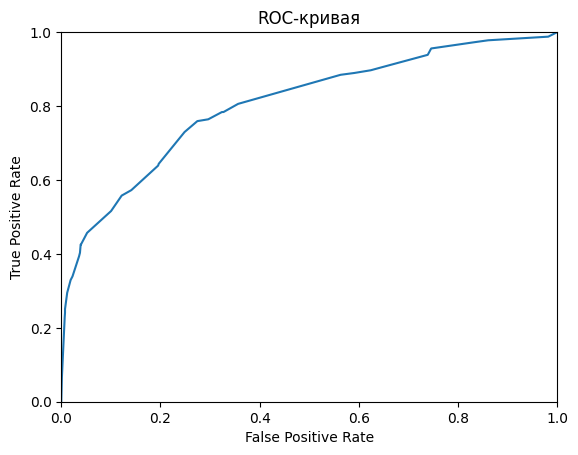

AUC-ROC: 0.8049497880006355


In [195]:
roc_auc_roc(best_model, features_valid, target_valid)

In [196]:
for depth in range(1, 10):
    for i in range(1, 11):
        features_upsampled, target_upsampled = upsample(features_train, target_train, i)
        model = DecisionTreeClassifier(random_state = RANDOM_STATE, max_depth=depth, class_weight = 'balanced')
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_result = result
            best_i = i
        
print(model, best_result, best_i)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=12345) 0.5446009389671361 10


In [197]:
for depth in range(1, 10):
    for i in range(1, 11):
        features_upsampled, target_upsampled = upsample(features_train, target_train, i)
        model = DecisionTreeClassifier(random_state = RANDOM_STATE, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_result = result
            best_i = i
        
print(model, best_result, best_i)

DecisionTreeClassifier(max_depth=9, random_state=12345) 0.5649263721552878 2


Решающее дерево также не помогло достичь необходимого результата

In [198]:
best_result = 0
best_model = None

for est in range(1, 11):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state = RANDOM_STATE, n_estimators = est, max_depth = depth, class_weight = 'balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result

info_row = {'type' : best_model, 'f1' : best_result}        
info_row



{'type': RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=7,
                        random_state=12345),
 'f1': 0.5892018779342724}

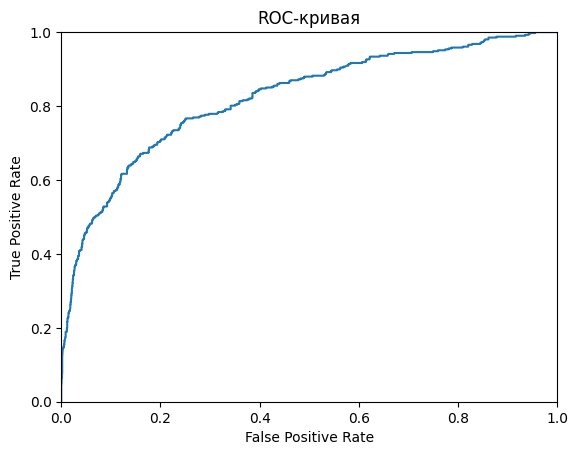

AUC-ROC: 0.8221480340124407


In [199]:
roc_auc_roc(best_model, features_valid, target_valid)

И рандомный лес тоже не помог

In [200]:
best_result=0
best_model = None


for est in range(15, 20):
    for depth in range(11, 13):
        for i in range(2, 4):
            features_upsampled, target_upsampled = upsample(features_train, target_train, i)
            model = RandomForestClassifier(random_state = RANDOM_STATE, n_estimators = est, max_depth = depth, class_weight = 'balanced')
            model.fit(features_upsampled, target_upsampled)
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            print(model, i, result)
            print()
            if result > best_result:
                best_model = model
                best_result = result
                best_i = i
        
print(best_model, best_result, best_i)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=15,
                       random_state=12345) 2 0.5769696969696969

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=15,
                       random_state=12345) 3 0.5811138014527846

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=15,
                       random_state=12345) 2 0.5821831869510665

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=15,
                       random_state=12345) 3 0.5735294117647058

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=16,
                       random_state=12345) 2 0.5859564164648912

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=16,
                       random_state=12345) 3 0.5808019441069259

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=16,
                       random_state=12345) 2 0.5804020100

Получилось создать модель с F1-score более 0,60 (не самая тривиальная задача была для меня, чего я только не пробовал).

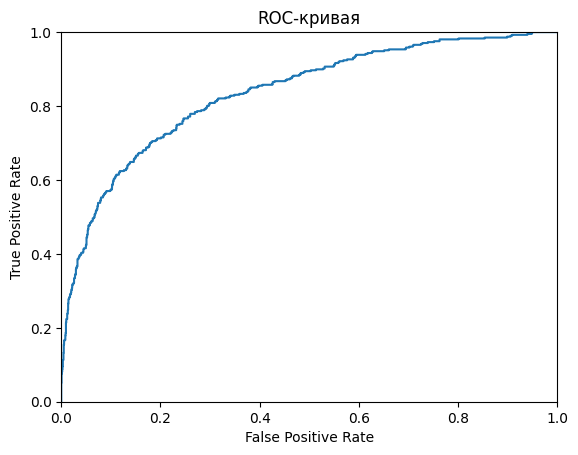

AUC-ROC: 0.8349929282132672


In [201]:
roc_auc_roc(best_model, features_valid, target_valid)

## Тестирование модели

In [202]:
predicted_test = best_model.predict(features_test)
result_test = f1_score(target_test, predicted_test)

print(result_test)

0.6338028169014084


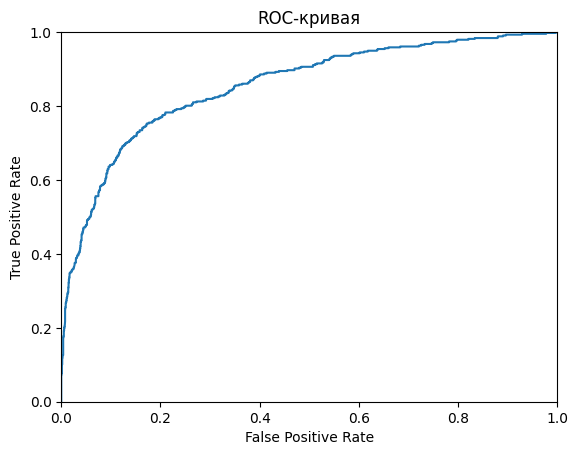

AUC-ROC: 0.8542518567971291


In [203]:
roc_auc_roc(best_model, features_test, target_test)

Для тестовой выборки точность ~0,64, что, как я понимаю, даже лучше, чем по требованию ТЗ

Выводы: 
    Исходные данные были приведены к виду, пригодному к анализу. Некоторые данные, ненужные для анализа, были удалены. Пропуски были заполнены.
    
   Далее данные категориальных значений были перекодированы. При этом были преприняты меры для избегания фиктивных признаков.
   
   Данные были разбиты на тренировочную/валидационную/тестовую выборки в отношении 60/20/20
   
   Для данных было проведено масштабирование.
   
   Было перебрано по меньшей мере около 4100 моделей типа логистическая регрессия, решающее дерево и случайный лес. В результате получилось достичь значения F1 меры 0.597051597051597 при модели RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=20, random_state=12345) с 9-и кратно увеличенной выборкой по редким классам.
   
   Значение F1-меры для best_model на тестовой выборке показывает ~0,64

https://github.com/zazik989/learn_with_teacher

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*